<a href="https://colab.research.google.com/github/darklucifar/machineLearn_0602/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ml0602/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ml0602/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f88ba729b50>)

In [3]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
test_df = pd.read_csv("test.csv", encoding="utf-8")

In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
data = pd.concat([train_df, test_df], ignore_index=True)
data = data.drop(["PassengerId", "Survived"], axis=1)
##drop() 方法來刪除觀測值或欄位，指定參數 axis = 0 表示要刪除觀測值（row），指定參數 axis = 1 表示要刪除欄位（column）。

In [6]:
na = data.isna().sum()
# Series[帶入根你的資料筆數一樣多True/False list]
na[na > 0].sort_values(ascending=False)##[]中括弧篩選條件na>0

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [7]:
def cabin_head(s):
    if not pd.isna(s):
        return s[0]
data["Cabin"] = data["Cabin"].apply(cabin_head)

In [8]:
dic = data["Ticket"].value_counts()
data["Ticket"] = data["Ticket"].apply(lambda t:dic[t])
##lambda(無名函式) t:dic[t]=>
##等同於def func(t): 
##     return dic[t];

In [9]:
# 補缺失值(類別: 最常出現) [!如果一堆測試資料, 不要重算, 直接補S]
most = data["Embarked"].value_counts().idxmax()
data["Embarked"] = data["Embarked"].fillna(most)
na = data.isna().sum()
# Series[帶入根你的資料筆數一樣多True/False list]
na[na > 0].sort_values(ascending=False)

##DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
##功能：使用指定的方法填充NA / NaN值
##参数：value : 变量, 字典, Series, or DataFrame
##用于填充缺失值（例如0），或者指定为每个索引（对于Series）或列（对于DataFrame）使用哪个字典/Serise/DataFrame的值。（不在字典/Series/DataFrame中的值不会被填充）这个值不能是一个列表。

Cabin    1014
Age       263
Fare        1
dtype: int64

In [10]:
# 補缺失值(數值: 中位數)
med = data.median().drop(["Pclass"])
data = data.fillna(med)
na = data.isna().sum()
# Series[帶入根你的資料筆數一樣多True/False list]
na[na > 0].sort_values(ascending=False)

Cabin    1014
dtype: int64

In [11]:
def name_convert(s):
  s = s.split(",")[-1].split(".")[0]
  s = s.strip()
  return s
counts = data["Name"].apply(name_convert).value_counts()
whitelist = counts[counts > 50].index
def name_convert(s):
  s = s.split(",")[-1].split(".")[0]
  s = s.strip()
  if s in whitelist:
    return s
  else:
    return None
data["Name"] = data["Name"].apply(name_convert)

In [12]:
## https://vimsky.com/zh-tw/examples/usage/python-pandas.get_dummies.html
data = pd.get_dummies(data)
data = pd.get_dummies(data, columns=["Pclass"])
data

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [13]:
# 模型建立完, 後續的嘗試, 只是我嘗試過, 所以我直接做
data["Family"] = data["SibSp"] + data["Parch"]
data

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [14]:
print(len(data))
print(data.shape)

1309
(1309, 26)


In [15]:
# .loc (根據列編號)(X) .iloc (根據第幾個)(O)
# .iloc [第一列, 第二列, 第三列...]
x_train = data.iloc[:train_df.shape[0]]
y_train = train_df["Survived"]
x_predict = data.iloc[train_df.shape[0]:]
x_train

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,1,13.0000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
887,19.0,0,0,1,30.0000,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
888,28.0,1,2,4,23.4500,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3
889,26.0,0,0,1,30.0000,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0


In [16]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
params = {
    # 1. 5 2. [1, 2, 3] 3. range
    # 20~99
    "n_estimators":range(20, 100),
    # 3~10
    "max_depth":range(3, 11)
}
clf = RandomForestClassifier()
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x_train, y_train)
print(cv.best_score_)
print(cv.best_params_)

0.8429088639201
{'max_depth': 7, 'n_estimators': 31}


In [17]:
clf = RandomForestClassifier(n_estimators=97, max_depth=8)
scores = cross_val_score(clf, x_train, y_train, cv=10, n_jobs=-1)
print("10:", scores)
print("average:", np.average(scores))

10: [0.81111111 0.8988764  0.73033708 0.8988764  0.87640449 0.82022472
 0.84269663 0.7752809  0.86516854 0.82022472]
average: 0.8339200998751559


In [18]:
clf = RandomForestClassifier(n_estimators=97, max_depth=8)
clf.fit(x_train, y_train)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})
df.to_csv("rf.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


97


[Text(279.0, 475.65000000000003, 'Name_Miss <= 0.5\ngini = 0.464\nsamples = 559\nvalue = [565, 326]\nclass = Dead'),
 Text(139.5, 339.75, 'Name_Mr <= 0.5\ngini = 0.406\nsamples = 449\nvalue = [511, 202]\nclass = Dead'),
 Text(69.75, 203.85000000000002, 'Pclass_3 <= 0.5\ngini = 0.443\nsamples = 117\nvalue = [61, 123]\nclass = Alived'),
 Text(34.875, 67.94999999999999, '\n  (...)  \n'),
 Text(104.625, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 203.85000000000002, 'Fare <= 26.269\ngini = 0.254\nsamples = 332\nvalue = [450, 79]\nclass = Dead'),
 Text(174.375, 67.94999999999999, '\n  (...)  \n'),
 Text(244.125, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 339.75, 'SibSp <= 2.5\ngini = 0.423\nsamples = 110\nvalue = [54, 124]\nclass = Alived'),
 Text(348.75, 203.85000000000002, 'Cabin_B <= 0.5\ngini = 0.365\nsamples = 99\nvalue = [38, 120]\nclass = Alived'),
 Text(313.875, 67.94999999999999, '\n  (...)  \n'),
 Text(383.625, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 203.8

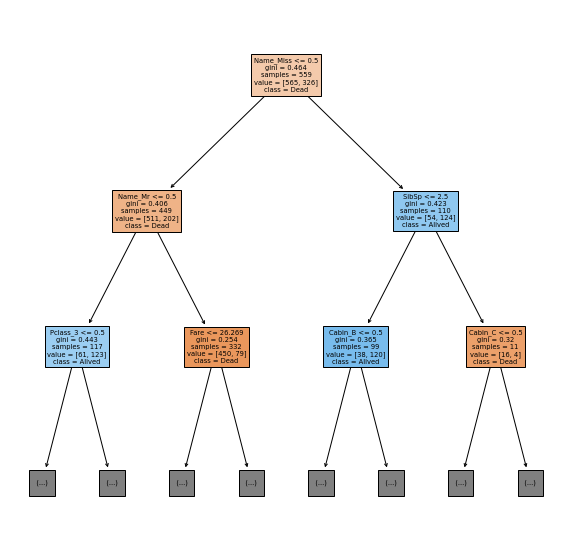

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
print(len(clf.estimators_))
plt.figure(figsize=(10, 10))
plot_tree(clf.estimators_[2], 
          feature_names=data.columns, 
          class_names=["Dead", "Alived"],
          max_depth=2,
          filled=True)

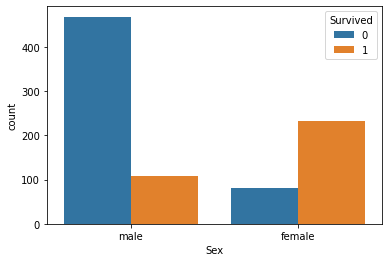

In [20]:
import seaborn as sns
sns.countplot(x=train_df["Sex"], hue=train_df["Survived"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

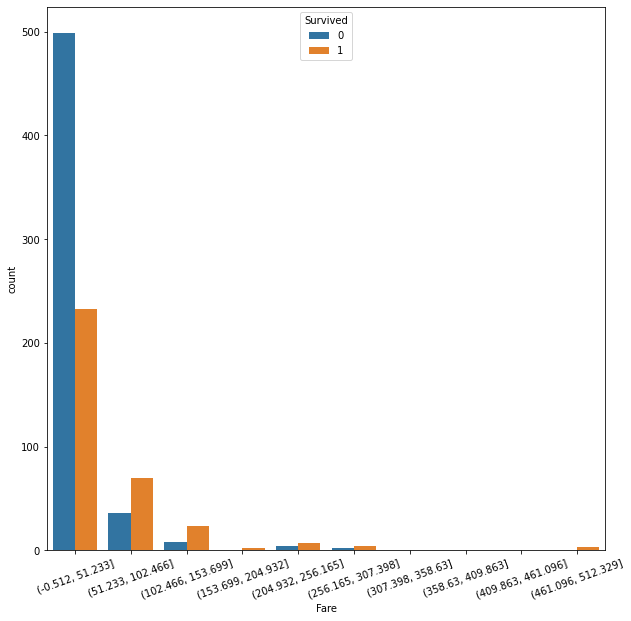

In [21]:
plt.figure(figsize=(10, 10))
c = pd.cut(train_df["Fare"], bins=10)
sns.countplot(c, hue=train_df["Survived"])
plt.xticks(rotation=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

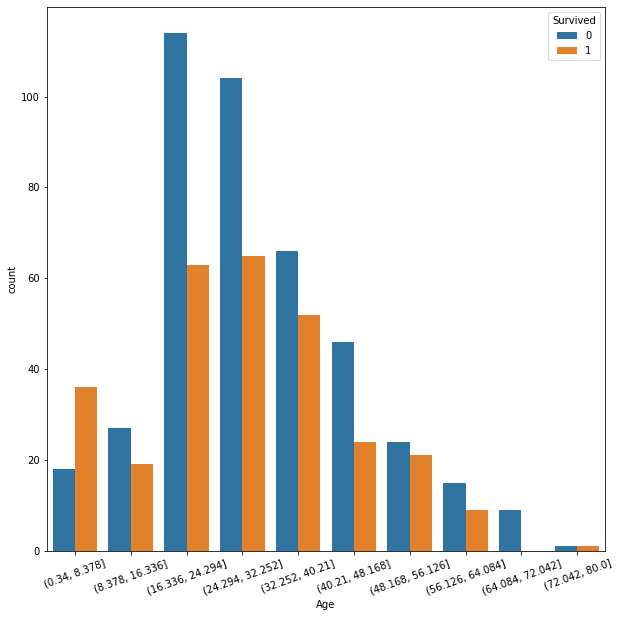

In [22]:
plt.figure(figsize=(10, 10))
c = pd.cut(train_df["Age"], bins=10)
sns.countplot(c, hue=train_df["Survived"])
plt.xticks(rotation=20)

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)
data_scale = pd.DataFrame(data_scale, columns=data.columns)
# .loc (根據列編號)(X) .iloc (根據第幾個)(O)
# .iloc [第一列, 第二列, 第三列...]
x_train_scale = data_scale.iloc[:train_df.shape[0]]
x_predict_scale = data_scale.iloc[train_df.shape[0]:]
x_train_scale

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.336089,0.000,0.000000,0.0,0.025374,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
887,0.235876,0.000,0.000000,0.0,0.058556,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
888,0.348616,0.125,0.222222,0.3,0.045771,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.3
889,0.323563,0.000,0.000000,0.0,0.058556,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
from sklearn.neighbors import KNeighborsClassifier
params = {
    "n_neighbors":range(3, 100)
}
clf = KNeighborsClassifier()
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x_train_scale, y_train)
print(cv.best_score_)
print(cv.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [25]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train_scale, y_train)
pre = clf.predict(x_predict_scale)
df = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})
df.to_csv("knn.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
